In [2]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
from numpy.linalg import matrix_power

In [3]:
N = 20; 
D = make_eig_spect(N, beta=1, alpha=1.5, flag=0)

In [4]:
def norm_est(D, P, lambd=0, num_trials=100):
    N = D.size
    s = 0;
    for i in range(num_trials):
        W = np.random.normal(0,1,size=(N,P))
        B = np.linalg.pinv(np.matmul(np.matmul(W.T, np.diag(D)), W) + lambd*np.eye(P))
        D_sqr = np.diag(D**2)
        B2 = np.matmul(np.matmul(W, matrix_power(B,2)), W.T)
        s += np.trace(np.matmul(B2, np.diag(D)))
    return s/num_trials

In [5]:
num_lambd = 10; lambd_list = 10**(np.linspace(-3,-1,num_lambd))
P = 40;
var_list = np.zeros((num_lambd, P))

for i in range(num_lambd):
    lambd0 = lambd_list[i]
    C = calc_emp_eigs(D, P, lambd=lambd0)
    for p in range(P):
        var_list[i,p] = norm_est(D, p, lambd=lambd0, num_trials=10)

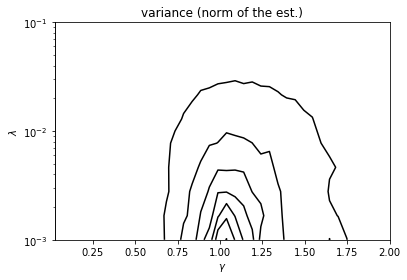

In [6]:
X, Y = np.meshgrid(np.linspace(1/P,P/N,P), lambd_list)
plt.contour(X, Y, var_list, colors='black');
plt.title('variance (norm of the est.)')
plt.ylabel('$\lambda$')
plt.xlabel('$\gamma$')
plt.yscale('log')

In [7]:
num_lambd = 10; lambd_list = 10**(np.linspace(-3,-1,num_lambd))
P = N;
bias_list = np.zeros((num_lambd, P))

for i in range(num_lambd):
    lambd0 = lambd_list[i]
    C = calc_emp_eigs(D, P, lambd=lambd0)
    for p in range(P):
        bias_list[i,p] = np.sum((1-C[p,:])**2 * D[:]) / N

Text(0.5, 0, '$\\gamma$')

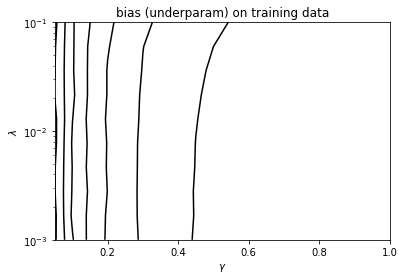

In [8]:
X, Y = np.meshgrid(np.linspace(1/P,P/N,P), lambd_list)
plt.contour(X, Y, bias_list, colors='black');
plt.yscale('log')
plt.title('bias (underparam) on training data')
plt.ylabel('$\lambda$')
plt.xlabel('$\gamma$')